# Pandas Library
: Python 을 이용한 데이터 처리와 분석을 위한 프레임워크

- 데이터의 계열과 표를 나타내기 편리한 데이터 구조 제공
- 데이터의 변환, 분할, 병합 및 변환에 용이
- Numpy 위에 구축됨
- 통계적 모델링 (선형 회귀 분석)에 대한 제한된 기능만 지원

## 1. 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

In [2]:
import seaborn as sns
# Matplot 위에 구현되는 통계적 시각화 라이브러리 (그래프 표현)

## 2. Series
: 1차원 배열을 위한 컨테이너 제공,  
데이터 계열을 정수가 아닌 레이블로 색인할 수 있다.

### 객체 생성

In [3]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

#### ↑  
그결과 객체는 데이터 유형이 int64인 Series 인스턴스, 그 구성 원소는 정수 0, 1, 2, 3으로 인덱스된다.

### 데이터 추출

In [4]:
list(s.index)  # index: 인덱스 추출

[0, 1, 2, 3]

In [5]:
s.values  # values: 값의 기저 데이터 추출

array([ 909976, 8615246, 2872086, 2273305], dtype=int64)

### 레이블 인덱싱

In [6]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"  # name: 리스트 이름 부여
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

###  키워드 인수로 설정

In [7]:
s = pd.Series([909976, 8615246, 2872086, 2273305], name = "Population", index = ["Stockholm", "London", "Rome", "Paris"])

In [8]:
s["London"]

8615246

In [9]:
s.Stockholm

909976

In [10]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

### 통계량 계산
- median: 중앙값
- mean: 평균값
- std: 표준편차
- min: 최솟값
- max: 최댓값
- quantile: 분위수

In [11]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [12]:
s.min(), s.max()

(909976, 8615246)

In [13]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

#### - describe: 데이터 요약

In [14]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

###  plot: 데이터 시각화

<AxesSubplot:title={'center':'pie'}, ylabel='Population'>

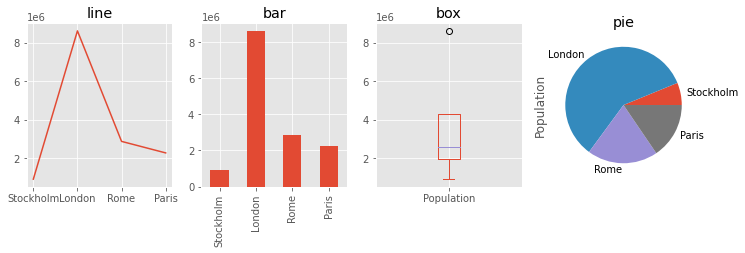

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind= 'line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

## 3. DataFrame
: Series 객체의 집합으로 볼 수 있는 고차원 배열을 위한 컨테이너 제공

### 객체 생성

In [16]:
df = pd.DataFrame([[909976, "Sweden"],
                  [8615246, "United Kingdom"],
                  [2872086, "Italy"],
                  [2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


###  레이블 인덱싱

In [17]:
df.index = ["Stockholm", "London", "Rome", "Paris"] # 행에 대한 레이블 인덱싱
df.columns = ["Population", "State"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


###  키워드 인수로 설정

In [18]:
df = pd.DataFrame([[909976, "Sweden"],
                  [8615246, "United Kingdom"],
                  [2872086, "Italy"],
                  [2273305, "France"]],
                 index=["Stockholm", "London", "Rome", "Paris"],
                 columns = ["Population", "State"])

In [19]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

###  키, 값을 사용한 딕셔너리 전달 {}

In [20]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                  "State": ["Sweden", "United Kingdom", "Italy", "France"]},
                 index=["Stockholm", "London", "Rome", "Paris"])

In [21]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

### loc 인덱서: 특정 행이나 열에 접근
#### - 행에 접근

In [22]:
df.loc["Stockholm"]  # 특정 행을 전달 --> 새로운 Series 객체 생성

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [23]:
df.loc[['Paris', "Rome"]]  # 특정 행 리스트를 전달 --> 새로운 DataFrame 객체 생성

,Population,State
Paris,2273305,France
Rome,2872086,Italy


#### - 행과 열에 동시 접근 

In [24]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

### 통계량 계산 (Series와 동일)
- median: 중앙값
- mean: 평균값
- std: 표준편차
- min: 최솟값
- max: 최댓값
- quantile: 분위수

In [25]:
df.mean()

C:\Users\shinwi\AppData\Local\Temp\ipykernel_12564\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Population    3667653.25
dtype: float64

##### ↑ 
두 열 중 하나만 수치 데이터 유형을 갖는다.

###  DataFrame 내용 요약

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [27]:
df.dtypes  # 데이터 유형 요약

Population     int64
State         object
dtype: object

In [28]:
!head -n 5 european_cities.csv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 4. 시계열
: 일정 시간 간격으로 주어지는 데이터 유형
- 일반적인 날짜, 시간, 주기 및 캘린더 작업 수행 가능

### DatetimeIndex 
- date_range

In [29]:
pd.date_range("2015-1-1", periods=31)
#(시작점, 원소 개수)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

#### ↑  
freq: 시점의 빈도 (기본값=하루)

In [30]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")
#(시작점, 종료점, freq)

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

#### 배열화 - series

In [31]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int32

#### 인덱싱

In [32]:
ts1["2015-1-3"]

2

In [33]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

#### Timestamp (정수형)

In [34]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [35]:
ts1.index[2].nanosecond

0

#### Datetime (문자형)
- pydatetime(): Timestamp --> Datetime

In [36]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

- 시계열 랜덤 생성

In [37]:
import datetime
ts2 = pd.Series(np.random.rand(2), index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])
ts2

2015-01-01    0.595076
2015-02-01    0.414136
dtype: float64

### PeriodIndex 

In [38]:
periods = pd.PeriodIndex([pd.Period('2015-01'),
                         pd.Period('2015-02'),
                         pd.Period('2015-03')])

#### 배열화 - series

In [39]:
ts3 = pd.Series(np.random.rand(3), index=periods)
ts3

2015-01    0.616575
2015-02    0.717017
2015-03    0.674521
Freq: M, dtype: float64

In [40]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]')

###  DatetimeIndex → PeriodIndex
- to_period('주기 빈도')

In [41]:
ts2.to_period('M')

2015-01    0.595076
2015-02    0.414136
Freq: M, dtype: float64

## 5. 시계열 예제

In [42]:
!head -n 5 temperature_outdoor_2014.tsv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


- read_csv  
: tsv 파일을 탭 단위로 끊으면 read_csv 명령어로 읽기 가능

In [43]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t",
                 names=["time", "outdoor"])
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t",
                 names=["time", "indoor"])

In [44]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [45]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


### 의미있는 시계열 데이터 표현
- to_datetime  
: UNIX 시간을 날짜 및 시간 객체로 변환
- tz_localize  
: timestamp를 지역화
- tz_convert  
: 시간대 속성을 Europe/Stockholm으로 변환

In [46]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
           .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2.time = (pd.to_datetime(df2.time.values, unit="s")
           .tz_localize('UTC').tz_convert('Europe/Stockholm'))

- set_index  
: 시간 열을 인덱스로 설정

In [47]:
df1 = df1.set_index("time")
df2 = df2.set_index("time")

In [48]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [49]:
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


<AxesSubplot:title={'center':'내외부 온도 시계열 도식화'}, xlabel='time'>

C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda

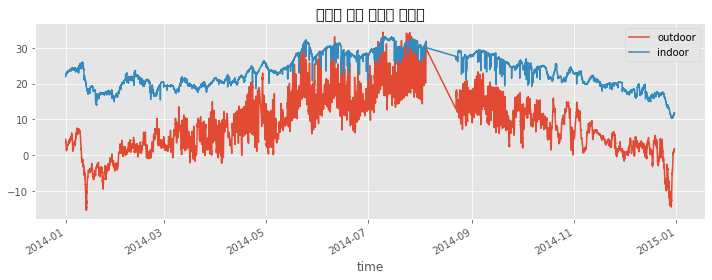

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title("내외부 온도 시계열 도식화")
df1.plot(ax=ax)
df2.plot(ax=ax)

#### info 메서드

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  49548 non-null  float64
dtypes: float64(1)
memory usage: 774.2 KB


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49545 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   indoor  49545 non-null  float64
dtypes: float64(1)
memory usage: 774.1 KB


### 관심있는 데이터 선택
- DataFrame의 부분 인덱싱

In [53]:
#전체 데이터에서 1월 데이터만을 선별 
mask_jan = (df1.index >= "2014-1-1") & (df1.index < "2014-2-1")
df1_jan = df1[mask_jan]

df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


- 슬라이싱

In [54]:
df2_jan = df2["2014-1-1":"2014-1-31"]
df2_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   indoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


<AxesSubplot:title={'center':'선택된 월(1월)의 내외부 온도의 시계열 도식화'}, xlabel='time'>

C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\a

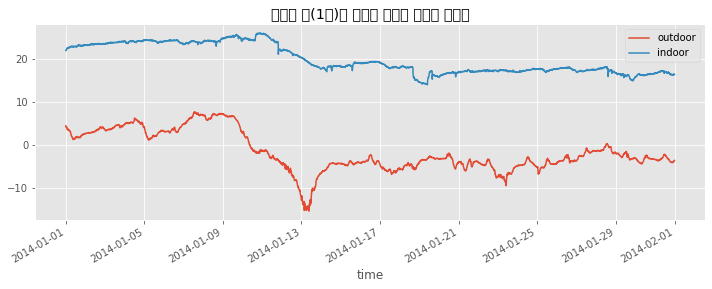

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title("선택된 월(1월)의 내외부 온도의 시계열 도식화")
df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

### 1년 중 각 달의 평균 온도를 계산하려면 
- 새로운 month의 열을 생성하고
- 그 month 열에 DatetimeIndex 인덱서의 Timestamp 값에 있는 month 필드를 할당

In [56]:
# 인덱스를 DataFrame의 열로 변환
df1_month = df1.reset_index()
# 새로 생성된 time 열에 apply
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


- DataFrame 을 새 month 필드로 그룹화하고
- 각 그룹 내 평균을 계산하기 위한 mean 함수를 사용

In [57]:
df1_month = df1_month.groupby("month").aggregate(np.mean)
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month = df2_month.groupby("month").aggregate(np.mean)

- join 메서드를 사용해 df1_month와 df2_month를 단일 DataFrame으로 병합

In [58]:
df_month = df1_month.join(df2_month)
df_month.head(3)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


### Simplification

In [59]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)
df_month.head(3)

C:\Users\shinwi\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\shinwi\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


<AxesSubplot:title={'center':'월별 내외부 온도'}>

C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinwi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shin

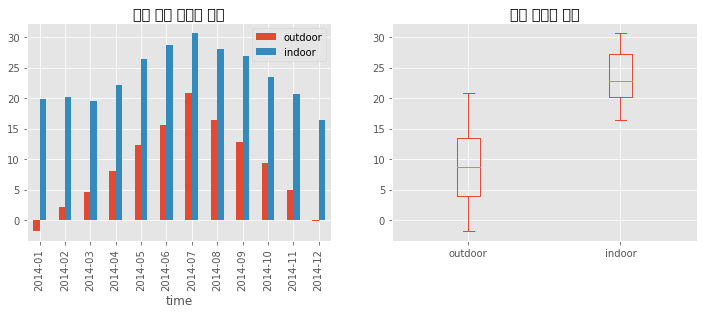

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("월별 평균 내외부 온도")
axes[1].set_title("월별 내외부 온도")

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

### resample
: 시계열의 데이터 포인트 수가 변화되는 것
- up-sampling  
: 누락된 값을 채우는 방법
- down-sampling  
: 새로운 표본 포인트마다 복수의 표본 포인트를 집계하는 방법

In [61]:
# 시간별, 일별, 주별, 월별 평균으로 외부 온도를 재표본
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]
df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]
df1_week = df1.resample("7D").mean()
df1_week.colums = ["outdoor (weekly avg.)"]
df1_month = df1.resample("M").mean()
df1_month.colums = ["outdoor (monthly avg.)"]
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

C:\Users\shinwi\AppData\Local\Temp\ipykernel_12564\425417645.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1_week.colums = ["outdoor (weekly avg.)"]
C:\Users\shinwi\AppData\Local\Temp\ipykernel_12564\425417645.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1_month.colums = ["outdoor (monthly avg.)"]


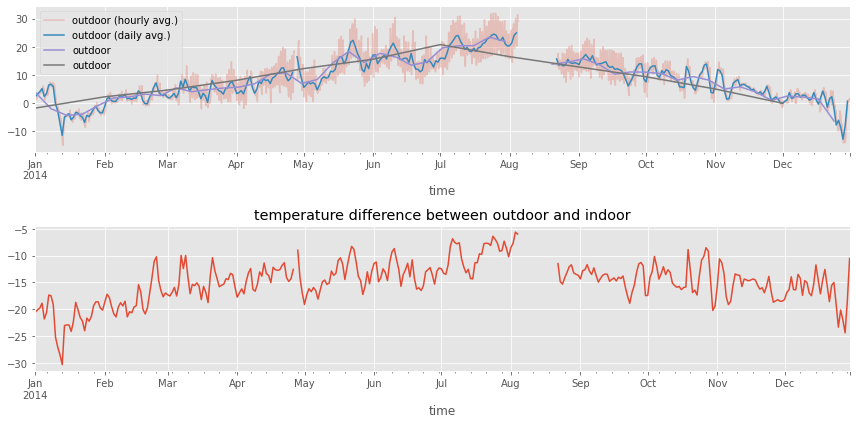

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)
df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")
fig.tight_layout()

In [63]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
          df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
          df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})],
         axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


## 6. Seaborn 그래픽 라이브러리
- 분포도 커널 밀도 도식화, 결합 분포 도식화, 히트맵 등 통계와 데이터 분석 작업에 유용한 그래프 생성을 위한 기능을 제공
- 통계 분석 및 데이터 시각화 분야에 세련된 상위 레벨 그래프 기능을 제공

#### sns.set 함수

In [64]:
sns.set(style="darkgrid")  #darkgrid: 회색 배경, whitegrid: 흰 배경

<AxesSubplot:xlabel='time'>

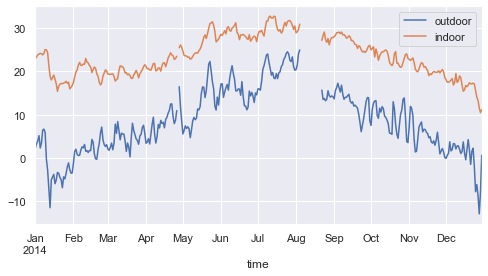

In [65]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t",
                  names=["time", "outdoor"])
df1.time = (pd.to_datetime(df1.time.values, unit="s")
           .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t",
                  names=["time", "indoor"])
df2.time = (pd.to_datetime(df2.time.values, unit="s")
           .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

#### sns.distplot 함수
: KDE 도면을 히스토그램 위에 중첩시켜 각각 도식화

C:\Users\shinwi\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\shinwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shinwi\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\shinwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibilit

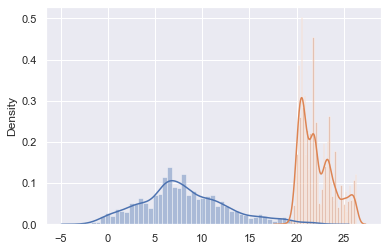

In [66]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].
            dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].
            dropna().values, bins=50);

#### sns.kdplot 함수
: KDE 도면을 히스토그램 위에 중첩시켜 각각 도식화
- 결합 커널-밀도 추정값의 등고선 그래프

C:\Users\shinwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shinwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


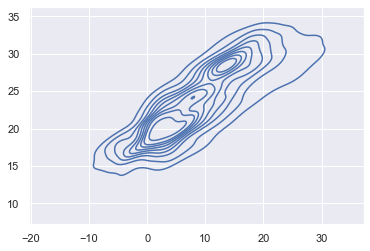

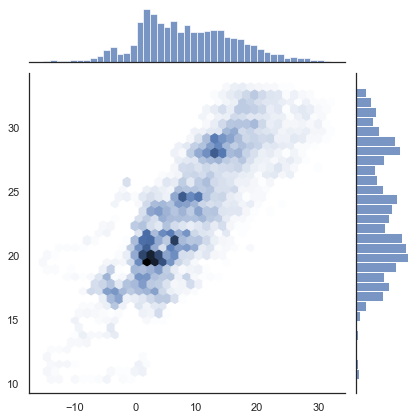

In [67]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
           df_temp.resample("H").mean()["indoor"].dropna().values, shade=False)
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                 df_temp.resample("H").mean()["indoor"].values, kind="hex")

#### sns.boxplot 함수
: 데이터셋의 기술 통계량을 시각화하기 위한 표준 상자 그림
#### sns.violinplot 함수
: 표준 상자의 변형으로 KDE 값이 상자 그림의 폭으로 나타나는 그림

<AxesSubplot:>

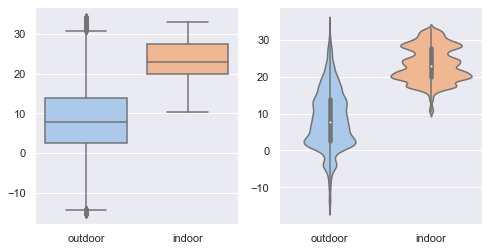

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(data=df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(data=df_temp.dropna(), ax=ax2, palette="pastel")

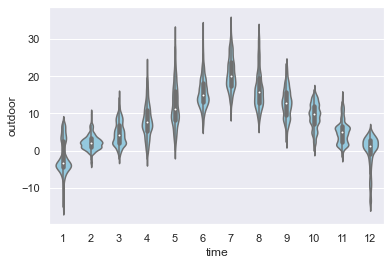

In [69]:
sns.violinplot(x=df_temp.dropna().index.month,
              y=df_temp.dropna().outdoor, color="skyblue");

#### sns.heatmap
: 범주형 변수, 특히 범주가 많은 변수에 유용한 그래프 

In [70]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour
table = pd.pivot_table(df_temp, values='outdoor',
                      index=['month'], columns=['hour'], aggfunc=np.mean)

<AxesSubplot:xlabel='hour', ylabel='month'>

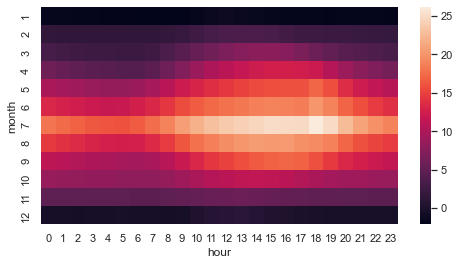

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax)